In [13]:
# %matplotlib notebook
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [14]:
# This code defines a nice shape for the center of mass of the system.
circle = mpath.Path.unit_circle()
wedge_1 = mpath.Path.wedge(90, 180)
wedge_2 = mpath.Path.wedge(270, 0)

verts = np.concatenate([circle.vertices, wedge_1.vertices[::-1, ...], wedge_2.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, wedge_1.codes, wedge_2.codes])
center_of_mass = mpath.Path(verts, codes)

In [15]:
# These masses represent the Earth-Moon system
m_1 = 5.974E24  # kg
m_2 = 7.348E22 # kg
pi_2 = m_2/(m_1 + m_2)

# These give us the coordinates of the orbits of m_2 and m_1
x_2 = (1 - pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_2 = (1 - pi_2) * np.sin(np.linspace(0, np.pi, 100))
x_1 = (-pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_1 = (-pi_2) * np.sin(np.linspace(0, np.pi, 100))

In [16]:
def collinear_lagrange(xstar, pi_2):
    """Calculate the resultant of the collinear Lagrange point equation.

    This is a function f(xstar, pi_2), where xstar is the nondimensional x coordinate
    and pi_2 is the nondimensional mass ratio. The function should be passed to
    scipy.optimize.newton (or another Newton solver) to find a value for xstar
    that satsifies the equation, for a given value of pi_2.

    The solver will try different values of xstar until the return value is equal to zero.
    """
    first_term = xstar
    second_term = (1 - pi_2) / np.abs(xstar + pi_2)**3 * (xstar + pi_2)
    third_term = pi_2 / np.abs(xstar - 1 + pi_2)**3 * (xstar - 1 + pi_2)
    return first_term - second_term - third_term

In [17]:
#newton(func, x0, args)

In [18]:
L_2 = newton(func=collinear_lagrange, x0=1, args=(pi_2,))
L_1 = newton(func=collinear_lagrange, x0=0, args=(pi_2,))
L_3 = newton(func=collinear_lagrange, x0=-1, args=(pi_2,))
print(f"{L_1=}, {L_2=}, {L_3=}")

L_1=0.8369154703225321, L_2=1.1556818961296604, L_3=-1.0050626166357435


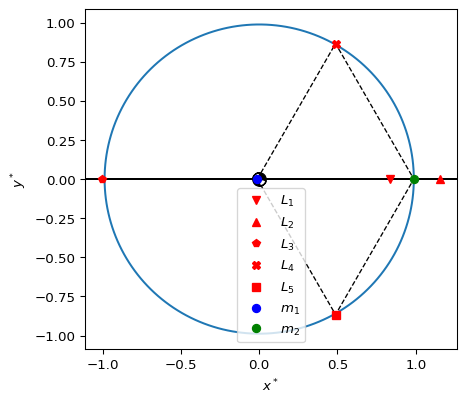

In [19]:
fig, ax = plt.subplots(figsize=(5,5), dpi=96)
ax.set_xlabel("$x^*$")
ax.set_ylabel("$y^*$")

# Plot the orbits
ax.axhline(0, color='k')
ax.plot(np.hstack((x_2, x_2[::-1])), np.hstack((y_2, -y_2[::-1])))
ax.plot(np.hstack((x_1, x_1[::-1])), np.hstack((y_1, -y_1[::-1])))
ax.plot([-pi_2, 0.5 - pi_2, 1 - pi_2, 0.5 - pi_2, -pi_2], [0, np.sqrt(3)/2, 0, -np.sqrt(3)/2, 0], 'k', ls="--", lw=1)

# Plot the Lagrange Points and masses
ax.plot(L_1, 0, 'rv', label="$L_1$")
ax.plot(L_2, 0, 'r^', label="$L_2$")
ax.plot(L_3, 0, 'rp', label="$L_3$")
ax.plot(0.5 - pi_2, np.sqrt(3)/2, 'rX', label="$L_4$")
ax.plot(0.5 - pi_2, -np.sqrt(3)/2, 'rs', label="$L_5$")
ax.plot(0, 0, 'k', marker=center_of_mass, markersize=10)
ax.plot(-pi_2, 0, 'bo', label="$m_1$")
ax.plot(1 - pi_2, 0, 'go', label="$m_2$")
ax.legend()
ax.set_aspect("equal")

(-1.5, 1.5, -1.5, 1.5)

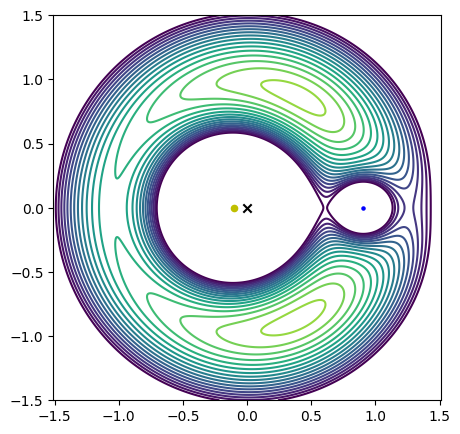

In [20]:
mu = 0.1
R = 1
sun_pos = np.array([-mu*R, 0])
earth_pos = np.array([(1-mu)*R, 0])

N = 1000
x, y = np.meshgrid(np.linspace(-1.5, 1.5, N), np.linspace(-1.5, 1.5, N))

term1 = -(1-mu) / ((x + mu)**2 + y**2)**0.5
term2 = -mu / ((x - (1-mu))**2 + y**2)**0.5
term3 = -0.5 * (x**2 + y**2)

u = term1 + term2 + term3

plt.figure(figsize=(5, 5))
levels = np.linspace(-1.8, -1.4, 20)
plt.contour(x, y, u, levels=levels)
plt.scatter([sun_pos[0]], [sun_pos[1]], c='y', s=20)
plt.scatter([earth_pos[0]], [earth_pos[1]], c='b', s=5)
plt.scatter([0], [0], c='k', marker='x')
plt.axis('equal')